Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib as plt
import seaborn as sns
import plotly.express as px
import matplotlib

Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Data collection  and Processing

In [ ]:
# loading the csv datacto aPandas DataFrame
wine_data = pd.read_csv('/content/drive/My Drive/wine.csv')

In [ ]:
#print first 5 rows of the dataset
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [ ]:
#print last 5 rows of the dataset
wine_data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,good


In [ ]:
#the number of rows and column of data set
wine_data.shape

(1599, 12)

In [ ]:
#getting some info about the data
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [ ]:
#checking for missing values
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
fig = px.histogram(wine_data, x='quality')
fig.show()

<Axes: >

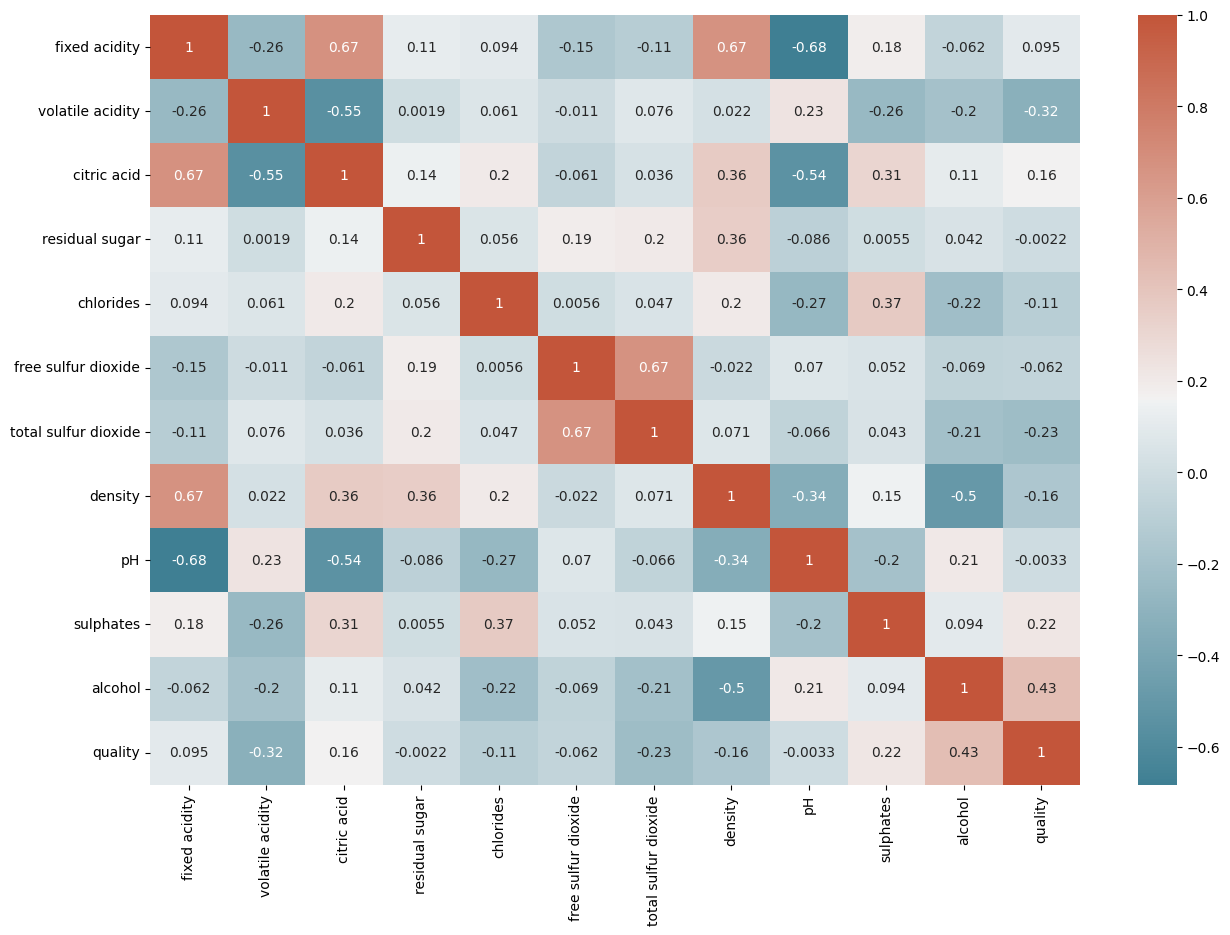

In [ ]:
corr = wine_data.corr()
matplotlib.pyplot.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

0    1599
Name: goodquality, dtype: int64

In [ ]:
# Create Classification version of target variable
wine_data['goodquality'] = [1 if x == "good" else 0 for x in wine_data['quality']]
# Separate feature variables and target variable
X = wine_data.drop(['quality','goodquality'], axis = 1)
y = wine_data['goodquality']

In [ ]:
# See proportion of good vs bad wines
wine_data['goodquality'].value_counts()

0    1599
Name: goodquality, dtype: int64

In [ ]:
#statistical measure about the data
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


Splitting the data into Training data & Test Data

In [ ]:
wine_data['quality'].unique()

array(['bad', 'good'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()


wine_data['quality'] = enc.fit_transform(wine_data['quality'])
print(wine_data[['quality', 'quality']].head())


   quality  quality
0        0        0
1        0        0
2        0        0
3        1        1
4        0        0


In [ ]:
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [ ]:
label=wine_data[['quality']]
features=wine_data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]

In [ ]:

xTrain, xTest, yTrain, yTest = train_test_split(features, label, test_size = 0.2, stratify= label, random_state = 1)

#minamx scaling
scaler = MinMaxScaler()

scaler.fit(xTrain)

xTrain_scaled = scaler.transform(xTrain)
xTest_scaled = scaler.transform(xTest)

print("per-feature minimum after scaling:\n {}".format(
    xTrain_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    xTrain_scaled.max(axis=0)))

per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# logistic Regression
model = LogisticRegression()
model.fit(xTrain_scaled, yTrain)
predictions = model.predict(xTest_scaled)
model_value = accuracy_score(yTest, predictions)
print('Logistic Regression: ',model_value)


# decision tree
clf = DecisionTreeClassifier(criterion='entropy',random_state=1)
clf.fit(xTrain_scaled,yTrain)

y_pred = clf.predict(xTest_scaled)
y_pred = clf.predict(xTest_scaled)
score=accuracy_score(y_pred,yTest)
print('Decision Tree: ',score)


Logistic Regression:  0.721875
Decision Tree:  0.75625


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


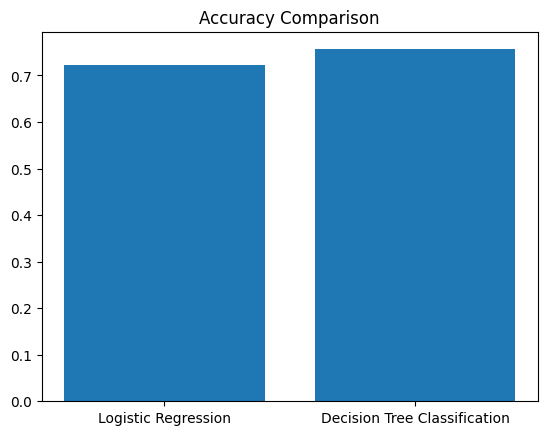

In [ ]:
plt.bar(['Logistic Regression', 'Decision Tree Classification'],[model_value, score])
plt.title('Accuracy Comparison')
plt.show()

Model training

<ipython-input-31-5a005a02e3c6>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(xTrain_scaled, yTrain)


Random Forest Score:  0.790625
New Random Forest Score:  0.83125


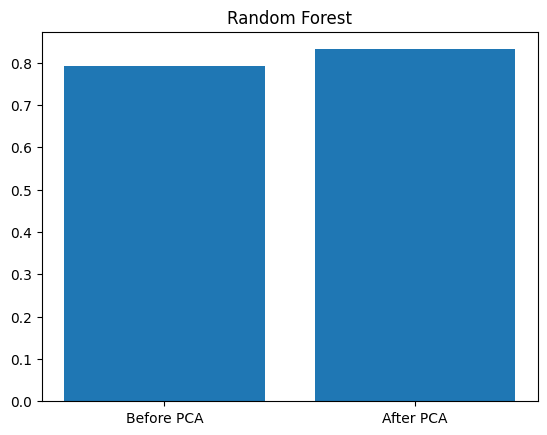

In [ ]:
rf = RandomForestClassifier(n_estimators=50)
rf.fit(xTrain_scaled, yTrain)
rf_score = rf.score(xTest_scaled, yTest)
print('Random Forest Score: ',rf_score)

X1= wine_data.drop("quality" , axis=1)
y1= wine_data["quality"]

new_X_train, new_X_test, new_Y_train, new_Y_test = train_test_split(X1, y1, test_size=0.2, random_state=0)
new_scaler = MinMaxScaler()
new_scaler.fit(new_X_train)

new_X_train_scaled = new_scaler.transform(new_X_train)
new_X_test_scaled = new_scaler.transform(new_X_test)

new_rf = RandomForestClassifier(n_estimators=50)
new_rf.fit(new_X_train_scaled, new_Y_train)
new_rf_score = new_rf.score(new_X_test_scaled, new_Y_test)
print('New Random Forest Score: ',new_rf_score)
plt.bar(['Before PCA', 'After PCA'],[rf_score, new_rf_score])
plt.title('Random Forest')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Logistic Regression
model = LogisticRegression()
model.fit(xTrain_scaled, yTrain)
predictions = model.predict(xTest_scaled)
print('Logistic Regression:', model_value)
print(classification_report(yTest, predictions))

# Decision Tree
clf = DecisionTreeClassifier(criterion='entropy',random_state=1)
clf.fit(xTrain_scaled,yTrain)
y_pred = clf.predict(xTest_scaled)
print('Decision Tree:', score)
print(classification_report(yTest, y_pred))

# Random Forest
rf = RandomForestClassifier(n_estimators=50)
rf.fit(xTrain_scaled, yTrain)
rf_predictions = rf.predict(xTest_scaled)
print('Random Forest:', new_rf_score)
print(classification_report(yTest, rf_predictions))


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-32-d276933ed155>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(xTrain_scaled, yTrain)


Logistic Regression: 0.721875
              precision    recall  f1-score   support

           0       0.70      0.70      0.70       149
           1       0.74      0.74      0.74       171

    accuracy                           0.72       320
   macro avg       0.72      0.72      0.72       320
weighted avg       0.72      0.72      0.72       320

Decision Tree: 0.75625
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       149
           1       0.76      0.79      0.78       171

    accuracy                           0.76       320
   macro avg       0.76      0.75      0.75       320
weighted avg       0.76      0.76      0.76       320

Random Forest: 0.83125
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       149
           1       0.80      0.82      0.81       171

    accuracy                           0.79       320
   macro avg       0.79      0.79      0.79       32